**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall! There are no problems apart from the driver error for BERT, I left a comment below to help you with that. Let me know if you have questions!

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

## Initialization

In [8]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [10]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load Data

In [11]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [12]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [13]:
df_reviews.head(7)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
5,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,This is the first movie I've seen from Singapo...,9,pos,1,test,9282
6,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Yes non-Singaporean's can't see what's the big...,9,pos,1,test,9283


In [14]:
# CHECKING FOR NULLS
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

In [15]:
df_reviews.isna().sum().sum()

4

In [16]:
# Finding the rows with nulls
df_reviews[df_reviews.isnull().any(axis=1)]

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22280,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"This is a truly great film, with excellent dir...",9,pos,1,test,3231
22281,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"A film is beyond all expectations, an excellen...",10,pos,1,test,3232


In [17]:
# Checking the rows related to the nulls
df_reviews[df_reviews['original_title'] == 'Mila Ass Painting']

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22280,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"This is a truly great film, with excellent dir...",9,pos,1,test,3231
22281,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"A film is beyond all expectations, an excellen...",10,pos,1,test,3232


In [18]:
df_reviews['average_rating'].describe()

count    47329.000000
mean         5.998278
std          1.494289
min          1.400000
25%          5.100000
50%          6.300000
75%          7.100000
max          9.700000
Name: average_rating, dtype: float64

In [19]:
# Fill the nulls in the average_rating column with the median
df_reviews['average_rating'].fillna(value=df_reviews['average_rating'].median(), inplace=True)

In [20]:
df_reviews['votes'].describe()

count    4.732900e+04
mean     2.556292e+04
std      8.367004e+04
min      9.000000e+00
25%      8.270000e+02
50%      3.197000e+03
75%      1.397400e+04
max      1.739448e+06
Name: votes, dtype: float64

In [21]:
# Fill the nulls of the votes column with the minimum since there are so few reviews
df_reviews['votes'].fillna(value=df_reviews['votes'].min(), inplace=True)

In [22]:
df_reviews.sample(7)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
14844,tt0175680,tvMovie,"Goodnight, Mister Tom","Goodnight, Mister Tom",1998,\N,108,0,"Drama,Family,War",7.8,3525,I have been familiar with the fantastic book o...,1,neg,0,train,11575
23124,tt0117107,movie,Mulholland Falls,Mulholland Falls,1996,\N,107,0,"Crime,Drama,Mystery",6.3,15421,The four LA cops in fedoras driving around in ...,4,neg,0,test,8647
36073,tt0080595,tvMovie,The Day Christ Died,The Day Christ Died,1980,\N,142,0,Drama,6.3,105,This movie is not as good as all the movies of...,4,neg,0,train,772
17801,tt0486138,movie,Il mio miglior nemico,Il mio miglior nemico,2006,\N,110,0,Comedy,6.0,1813,i liked this movie a lot.I rented this expecti...,8,pos,1,train,7328
36276,tt0069969,movie,The Devil in Miss Jones,Devil in Miss Jones,1973,\N,67,1,"Adult,Drama,Fantasy",6.3,1462,a friend gave it to me saying it was another c...,1,neg,0,train,4015
44224,tt0083228,tvMovie,Troilus & Cressida,Troilus & Cressida,1981,\N,190,0,Drama,6.4,113,I rented this TV movie version of 'Troilus and...,3,neg,0,test,9275
15080,tt0385002,movie,Green Street Hooligans,Hooligans,2005,\N,109,0,"Crime,Drama,Sport",7.5,139209,"Where to start? OK, don't compare this film to...",3,neg,0,train,4455


In [23]:
df_reviews[df_reviews.duplicated()]

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx


In [24]:
df_reviews['end_year'].value_counts()

\N      45052
2007      225
2008      190
2006      140
2009      130
2010      124
2003      102
2002       97
2005       96
1996       96
2004       84
2001       75
1995       69
1999       61
1983       55
1989       49
2012       47
1985       40
2000       40
1976       37
1987       35
1994       34
1986       33
2017       32
1998       27
1990       26
2011       22
1982       21
2013       19
1975       17
2014       17
1960       16
1984       16
1981       16
1997       16
1973       15
1979       15
1991       14
1988       14
1993       13
1977       10
1978        9
1974        7
1965        7
1972        7
1970        7
1961        6
1969        6
2020        6
1957        5
1980        5
2016        5
1966        4
2018        4
2019        4
1955        4
1962        3
1968        2
1953        2
1959        1
Name: end_year, dtype: int64

In [25]:
df_reviews['average_rating'].value_counts()

6.6    1664
7.2    1621
6.7    1545
6.2    1500
6.4    1495
       ... 
1.4      12
9.4       9
9.3       5
9.7       5
9.6       2
Name: average_rating, Length: 83, dtype: int64

In [26]:
df_reviews['average_rating'].unique()

array([6.3, 6.1, 5.8, 4.8, 7.6, 6.4, 8.5, 7.1, 6.6, 4.9, 3.6, 8. , 8.4,
       5.4, 6.2, 5.1, 6.8, 6.9, 4.1, 5.6, 8.6, 8.3, 5.9, 3.4, 6.7, 6.5,
       5.3, 7.2, 7.9, 4.2, 2.8, 7.4, 7.3, 7. , 4.5, 6. , 7.8, 8.8, 8.2,
       4.6, 5.2, 5.7, 7.5, 5.5, 2.9, 7.7, 8.1, 4.3, 4. , 4.4, 2.6, 3.7,
       4.7, 3.2, 1.9, 2.5, 9.2, 2.4, 3.8, 8.7, 5. , 2.3, 1.5, 3.9, 9. ,
       2.7, 3.1, 1.7, 3.3, 3.5, 3. , 2.2, 1.6, 1.8, 9.3, 2.1, 8.9, 9.1,
       9.4, 2. , 9.7, 9.6, 1.4])

In [27]:
df_reviews['rating'].unique()

array([ 1,  3,  7,  9,  2,  4,  8, 10])

In [28]:
df_reviews['ds_part'].unique()

array(['train', 'test'], dtype=object)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected

</div>

## EDA

Let's check the number of movies and reviews over years.

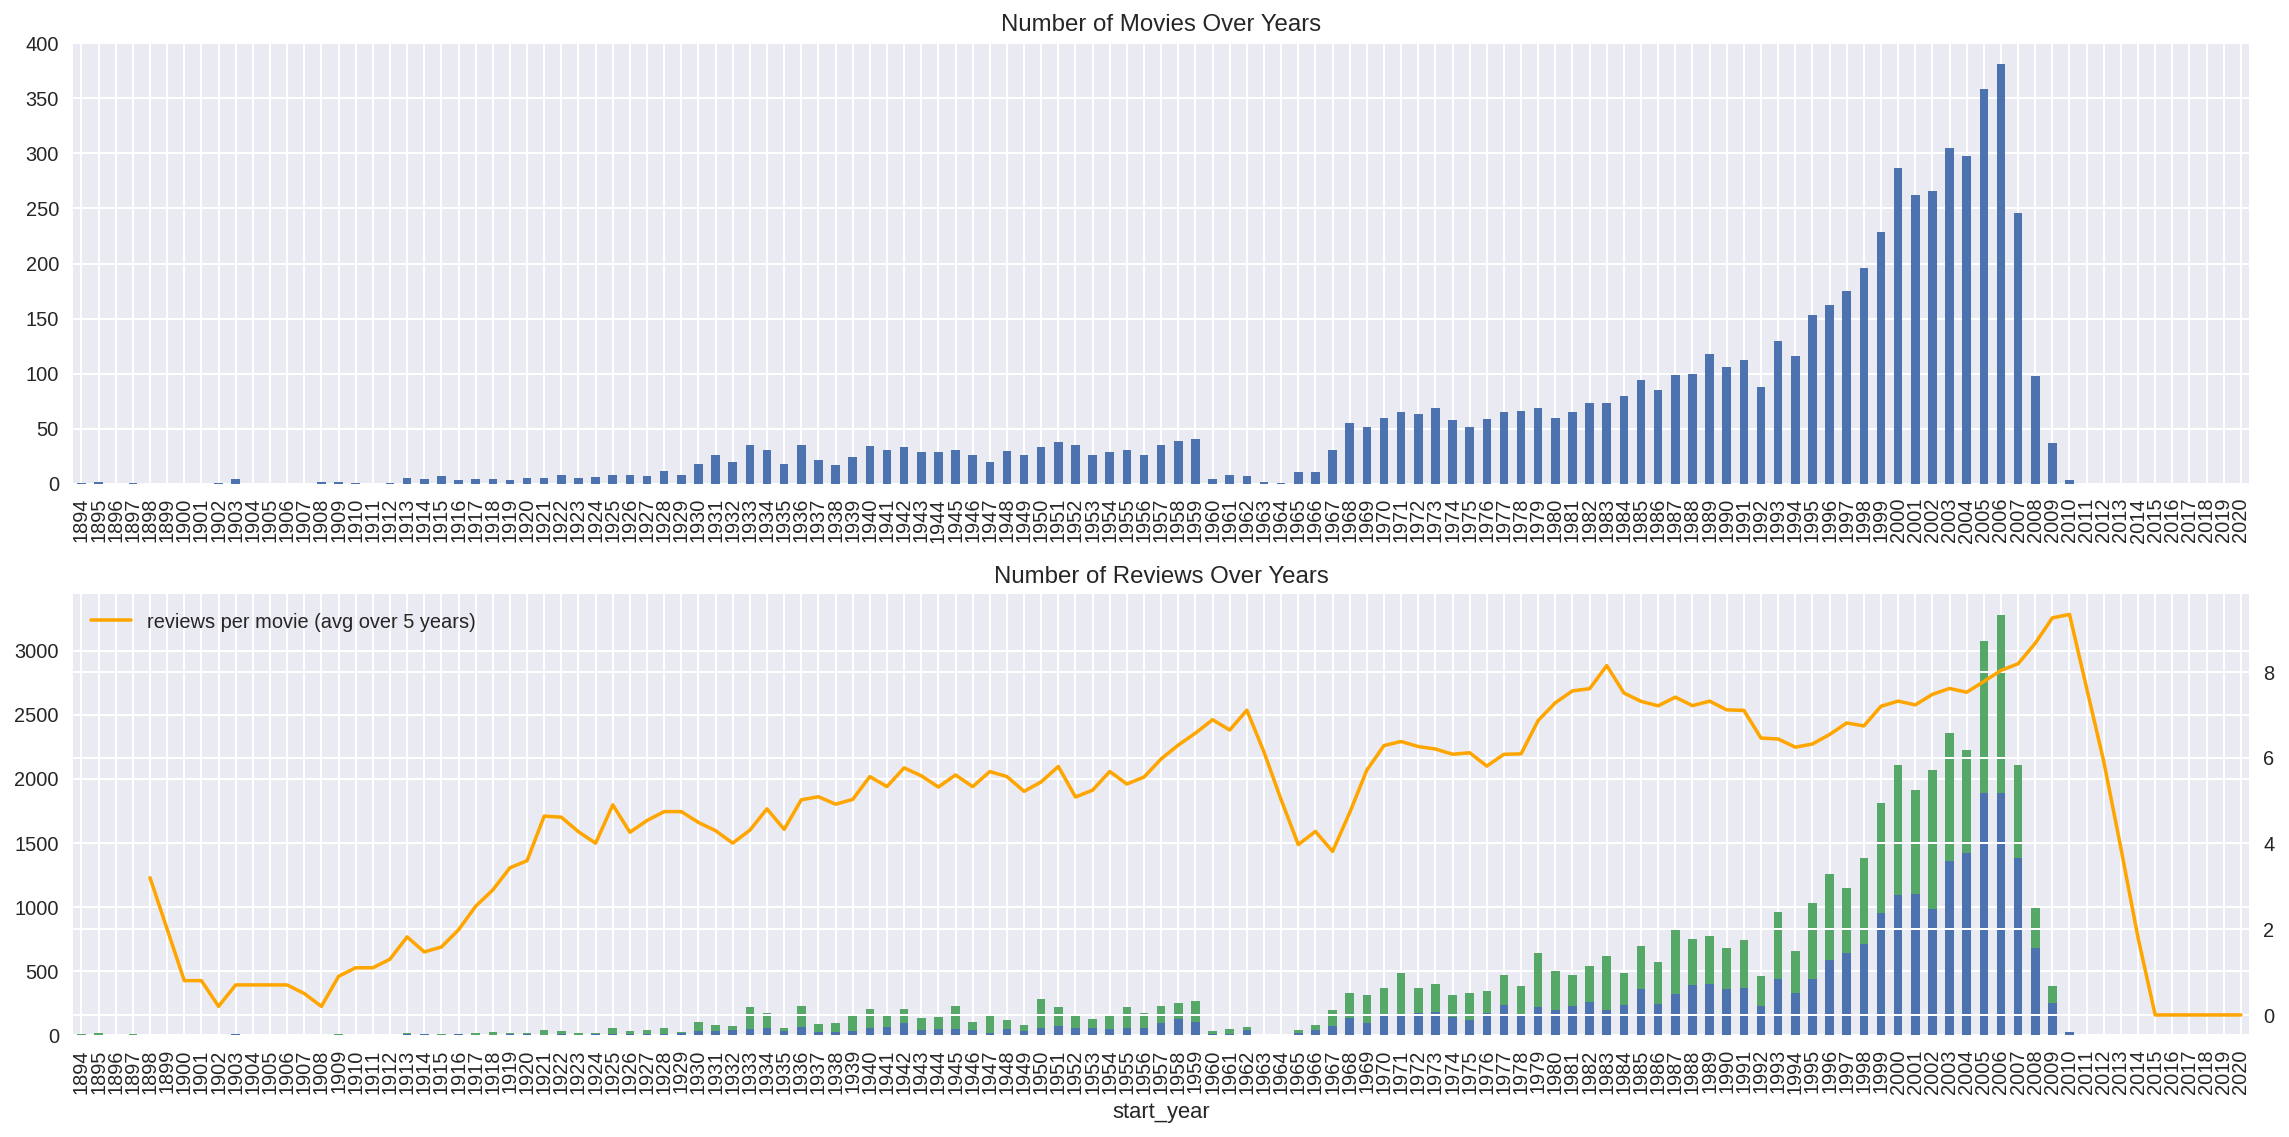

In [22]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

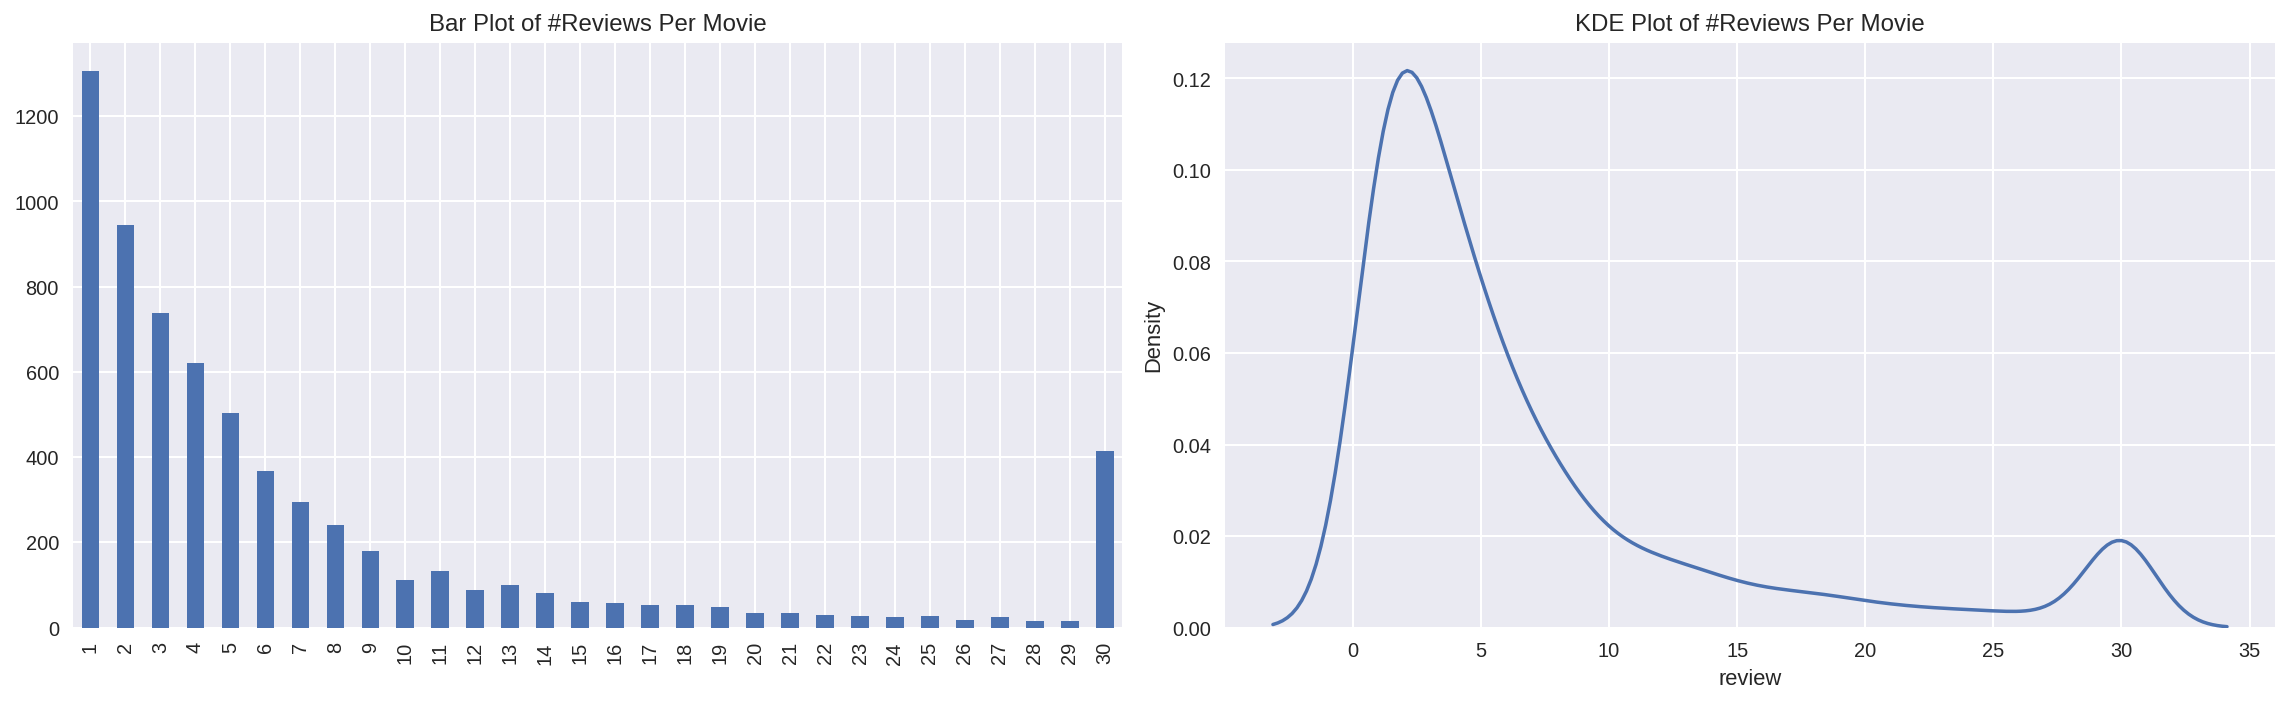

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

The number of reviews per movie is left skewed, with most movies receiving few reviews as shown in the bar and KDE plots.

In [24]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

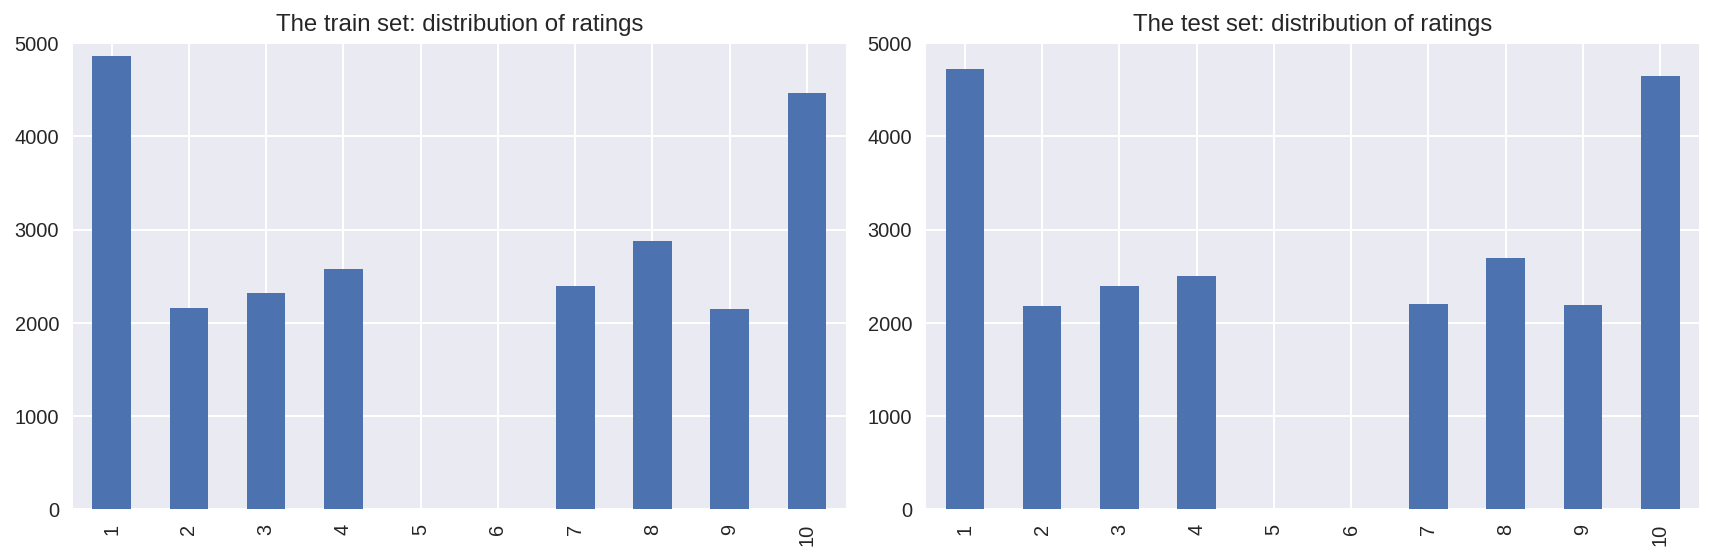

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

The distribution of ratings for the train and test sets are just about the same.

Distribution of negative and positive reviews over the years for two parts of the dataset

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


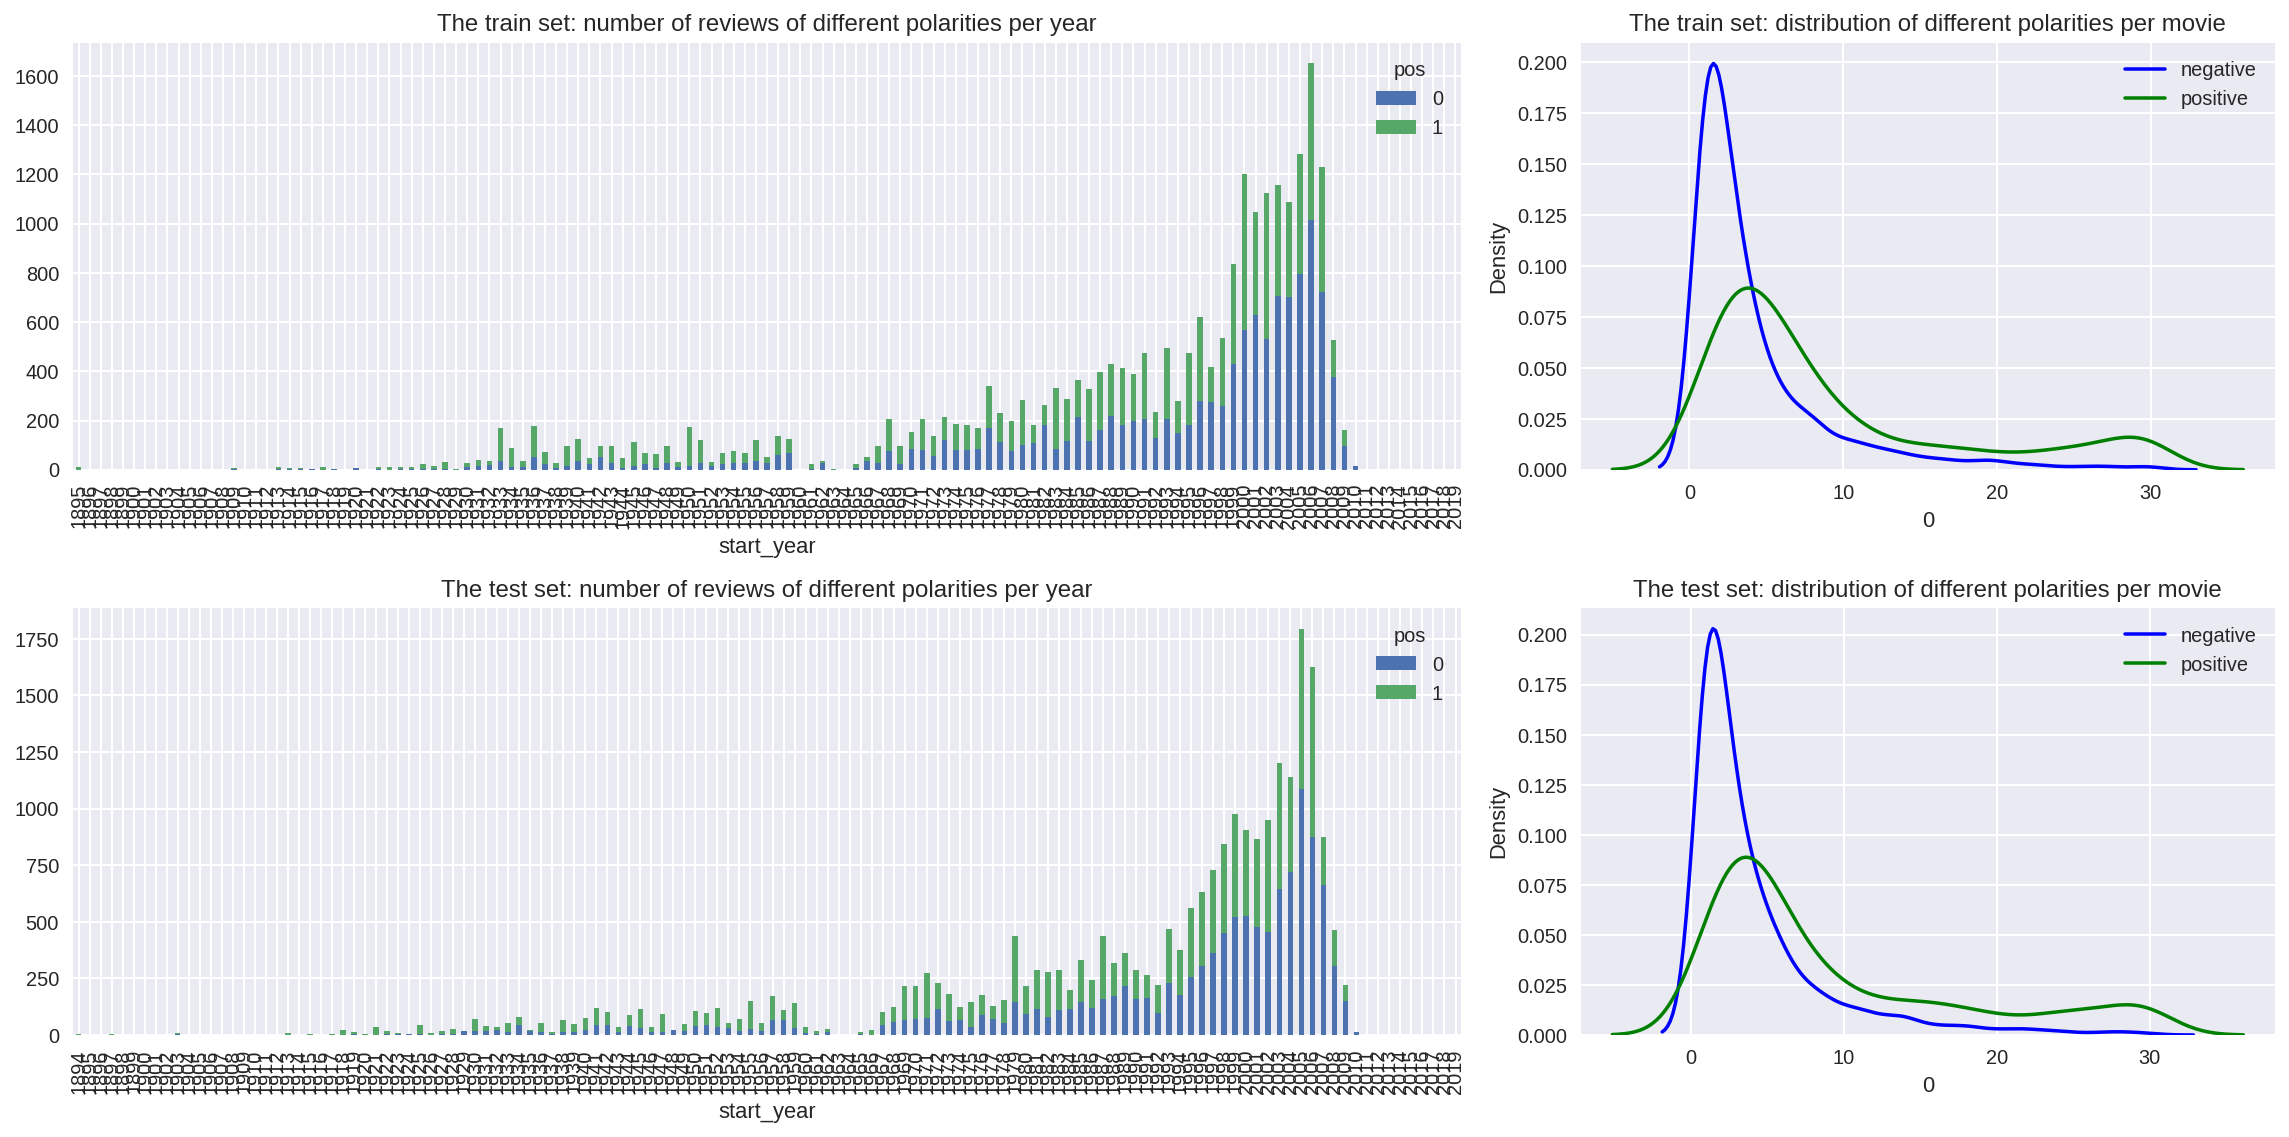

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Would be nice if you added some comments to the plots

</div>

<div class="alert alert-info">
  Updated and included comments on the plots.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Great!

</div>

In terms of polarities per year, the train and test sets are near identical, and thus a good way to split the data.

In [27]:
print(df_reviews.groupby(['pos', 'rating'])['rating'].count())  # ['rating', 'review']

pos  rating
0    1         9589
     2         4339
     3         4709
     4         5078
1    7         4593
     8         5576
     9         4343
     10        9104
Name: rating, dtype: int64


In [106]:
#df_reviews.groupby(['pos', 'average_rating'])['average_rating'].count().plot()

There is a direct relationship between the rating and pos values. Ratings below 5 have a negative (0) review and above 5 have a positive (1) review.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Right!

</div>

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [7]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [29]:
# import spacy
# import re

# nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# def clear_text(text):
#     pattern = r"[^a-zA-Z']"
#     cleared = re.sub(pattern, ' ', text)
#     cleared = " ".join(cleared.split())
#     doc = nlp(cleared.lower())  # .lower()

#     lemmas = []
#     for token in doc:
#         lemmas.append(token.lemma_)

#     return ' '.join(lemmas)

In [29]:
import re

def normalize(text):
    # convert to lower case
    lower_string = text.lower()
 
    # remove numbers
    no_number_string = re.sub(r'\d+','',lower_string)
 
    # remove all punctuation except words and space
    no_punc_string = re.sub(r'[^\w\s]','', no_number_string) 
 
    # remove white spaces
    no_wspace_string = no_punc_string.strip()

    return no_wspace_string 

In [30]:
normalize(df_reviews.loc[6435, 'review'])

'ive seen this film at least  times since  and its still great every time i see it its a very compelling version of the opera carmen with amazing flamenco dancing bare bones sets and of course wonderful music this telling of carmen is a story within a story with each paralleling the other until the doubly tragic ending obviously a low budget spanish production the film contains dancing by some of spains premier flamenco dancers the combination of the soaring opera music and the sound of the dancers boots on the wooden stage makes the telling of the story even more powerful its independent movie making at its best and probably my all time favorite foreign film'

In [31]:
# for i in range(df_reviews.shape[0]):
#     df_reviews.loc[i, 'review_norm'] = clear_text(df_reviews.loc[i, 'review'])
df_reviews['review_norm'] = df_reviews['review'].apply(lambda x: normalize(x))

In [32]:
df_reviews['review_norm']

0        the pakage implies that warren beatty and gold...
1        how the hell did they get this made presenting...
2        there is no real story the film seems more lik...
3        um  a serious film about troubled teens in sin...
4        im totally agree with garryjohal from singapor...
                               ...                        
47326    this is another of my favorite columbos it spo...
47327    talk about being boring i got this expecting a...
47328    i never thought id say this about a biopic but...
47329    spirit and chaos is an artistic biopic of miya...
47330    ill make this brief this was a joy to watch it...
Name: review_norm, Length: 47331, dtype: object

<div class="alert alert-success">
<b>Reviewer's comment</b>

Texts were normalized successfully!

</div>

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [33]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


In [34]:
# df_reviews_train
print(train_target, test_target)

0        0
1        0
7        0
8        0
9        0
        ..
47253    1
47254    1
47255    1
47256    1
47257    0
Name: pos, Length: 23796, dtype: int64 2        0
3        1
4        1
5        1
6        1
        ..
47326    1
47327    0
47328    1
47329    1
47330    1
Name: pos, Length: 23535, dtype: int64


In [35]:
# features
train_features_reviews = df_reviews_train['review_norm']
test_features_reviews = df_reviews_test['review_norm']
print(train_features_reviews.shape)
print(test_features_reviews.shape)

(23796,)
(23535,)


In [37]:
# train_features_reviews

## Working with models

### Model 0 - Constant

In [36]:
from sklearn.dummy import DummyClassifier

In [39]:
dummy_clf = DummyClassifier(strategy="uniform")  # , constant=0)
dummy_clf.fit(df_reviews_train, train_target)
predict_dummy = dummy_clf.predict(df_reviews_test)

In [40]:
metrics.f1_score(test_target, predict_dummy)

0.4993832149389596

          train  test
Accuracy   0.50  0.51
F1         0.51  0.50
APS        0.50  0.50
ROC AUC    0.50  0.50


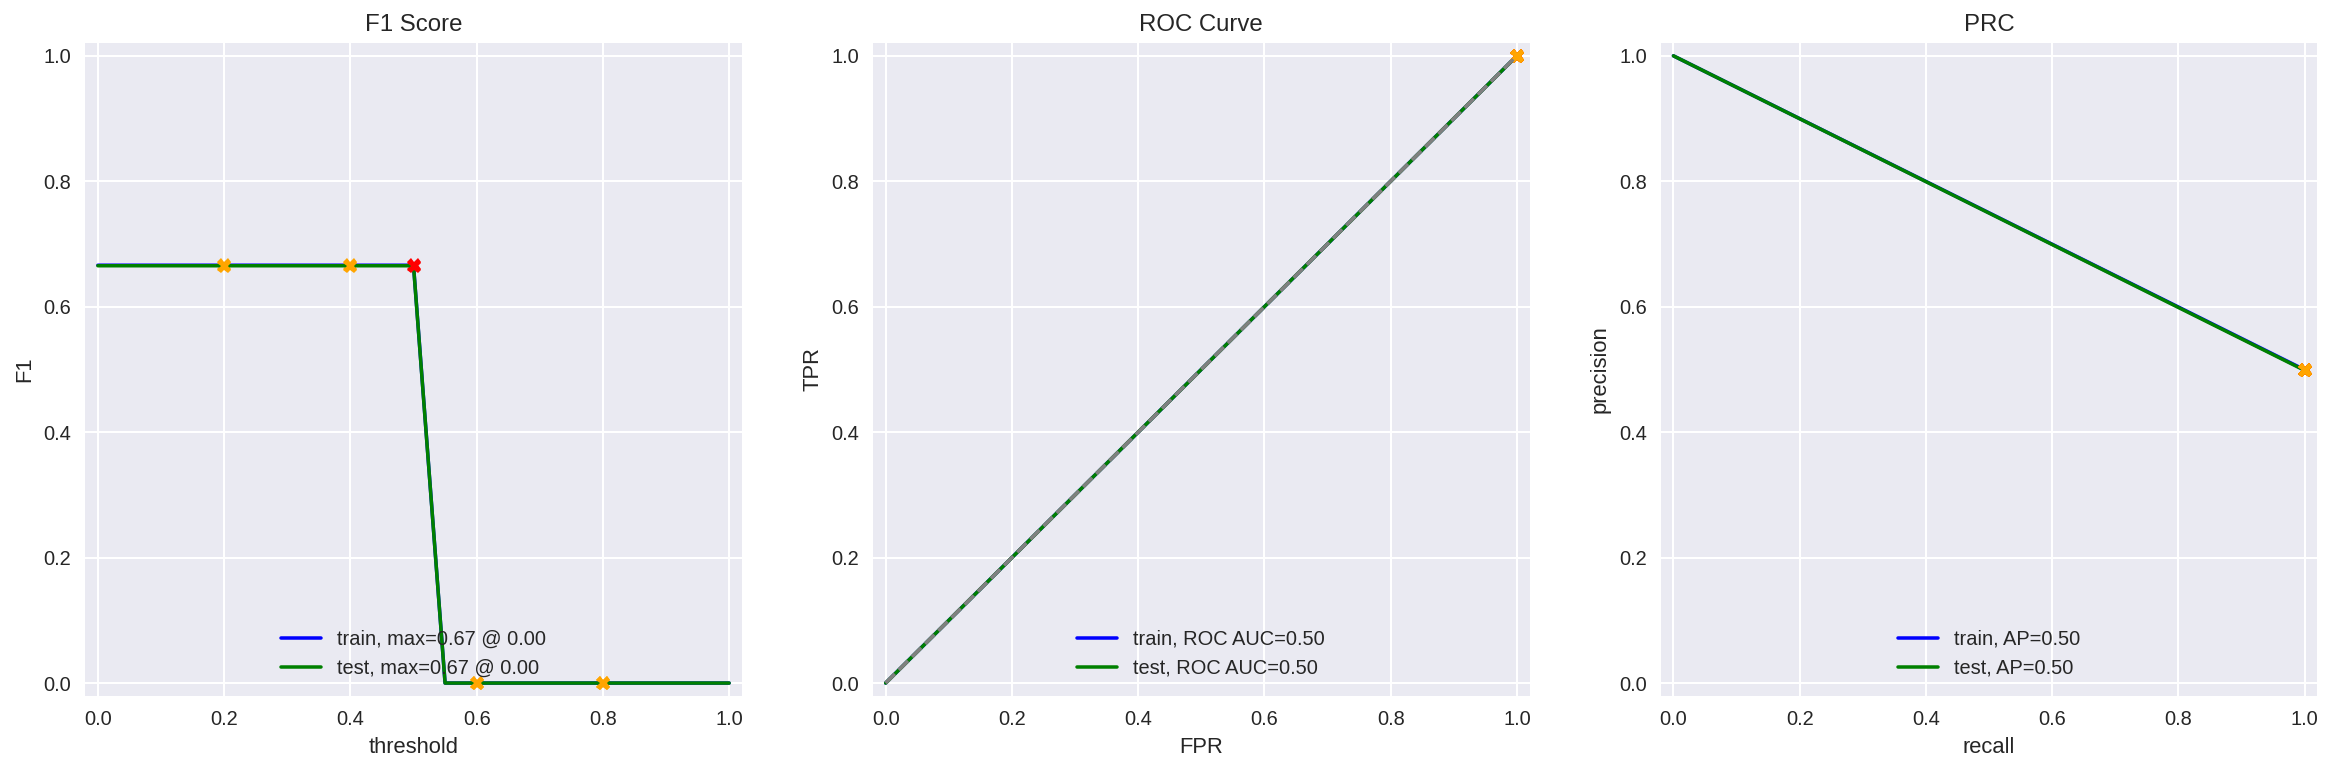

In [41]:
evaluate_model(dummy_clf, train_features_reviews, train_target, test_features_reviews, test_target)

With the dummy model, the F1 score is 0.50 to set a baseline for the other models.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Yeah, not a very useful baseline :) Maybe `strategy='uniform'` would work better in this case as a baseline (predicting uniformly at random instead of a constant 0)

</div>

<div class="alert alert-info">
  Updated the strategy to uniform for dummy model and updated the baseline F1 score.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Awesome! Beating a baseline with F1 score of 0.5 is a lot more meaningful than beating a baseline with F1 score equal to 0, right? :)

</div>

### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [42]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [43]:
# TF-IDF
stop_words = set(stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stop_words)
#tf_idf = count_tf_idf.fit_transform(corpus)

In [44]:
# NLTK, TF-IDF
corpus = df_reviews['review_norm']

In [45]:
tf_idf = count_tf_idf.fit_transform(corpus)
print(tf_idf.shape)  # (47331, 157856)

(47331, 157856)


In [46]:
# For section 8
tfidf_vectorizer_2 = count_tf_idf.fit(corpus)

In [47]:
print(tfidf_vectorizer_2)

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})


In [48]:
# print(tfidf_vectorizer_2.transform(corpus))

In [49]:
train_features_reviews.index

Int64Index([    0,     1,     7,     8,     9,    10,    38,    43,    44,
               45,
            ...
            47248, 47249, 47250, 47251, 47252, 47253, 47254, 47255, 47256,
            47257],
           dtype='int64', length=23796)

In [50]:
train_features_1 = tf_idf[train_features_reviews.index]
print(train_features_1.shape)

(23796, 157856)


In [51]:
test_features_1 = tf_idf[test_features_reviews.index]
print(test_features_1.shape)

(23535, 157856)


In [52]:
model_1 = LogisticRegression(random_state=12345)  # solver='liblinear', 
model_1.fit(train_features_1, train_target)

LogisticRegression(random_state=12345)

In [53]:
pred_test = model_1.predict(test_features_1)
print(pred_test)

[0 1 1 ... 1 1 1]


In [54]:
metrics.f1_score(test_target, pred_test)

0.882769204535766

In [55]:
# evaluate_model(model_1b, tf_idf_train, train_target, tf_idf_test, test_target)

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


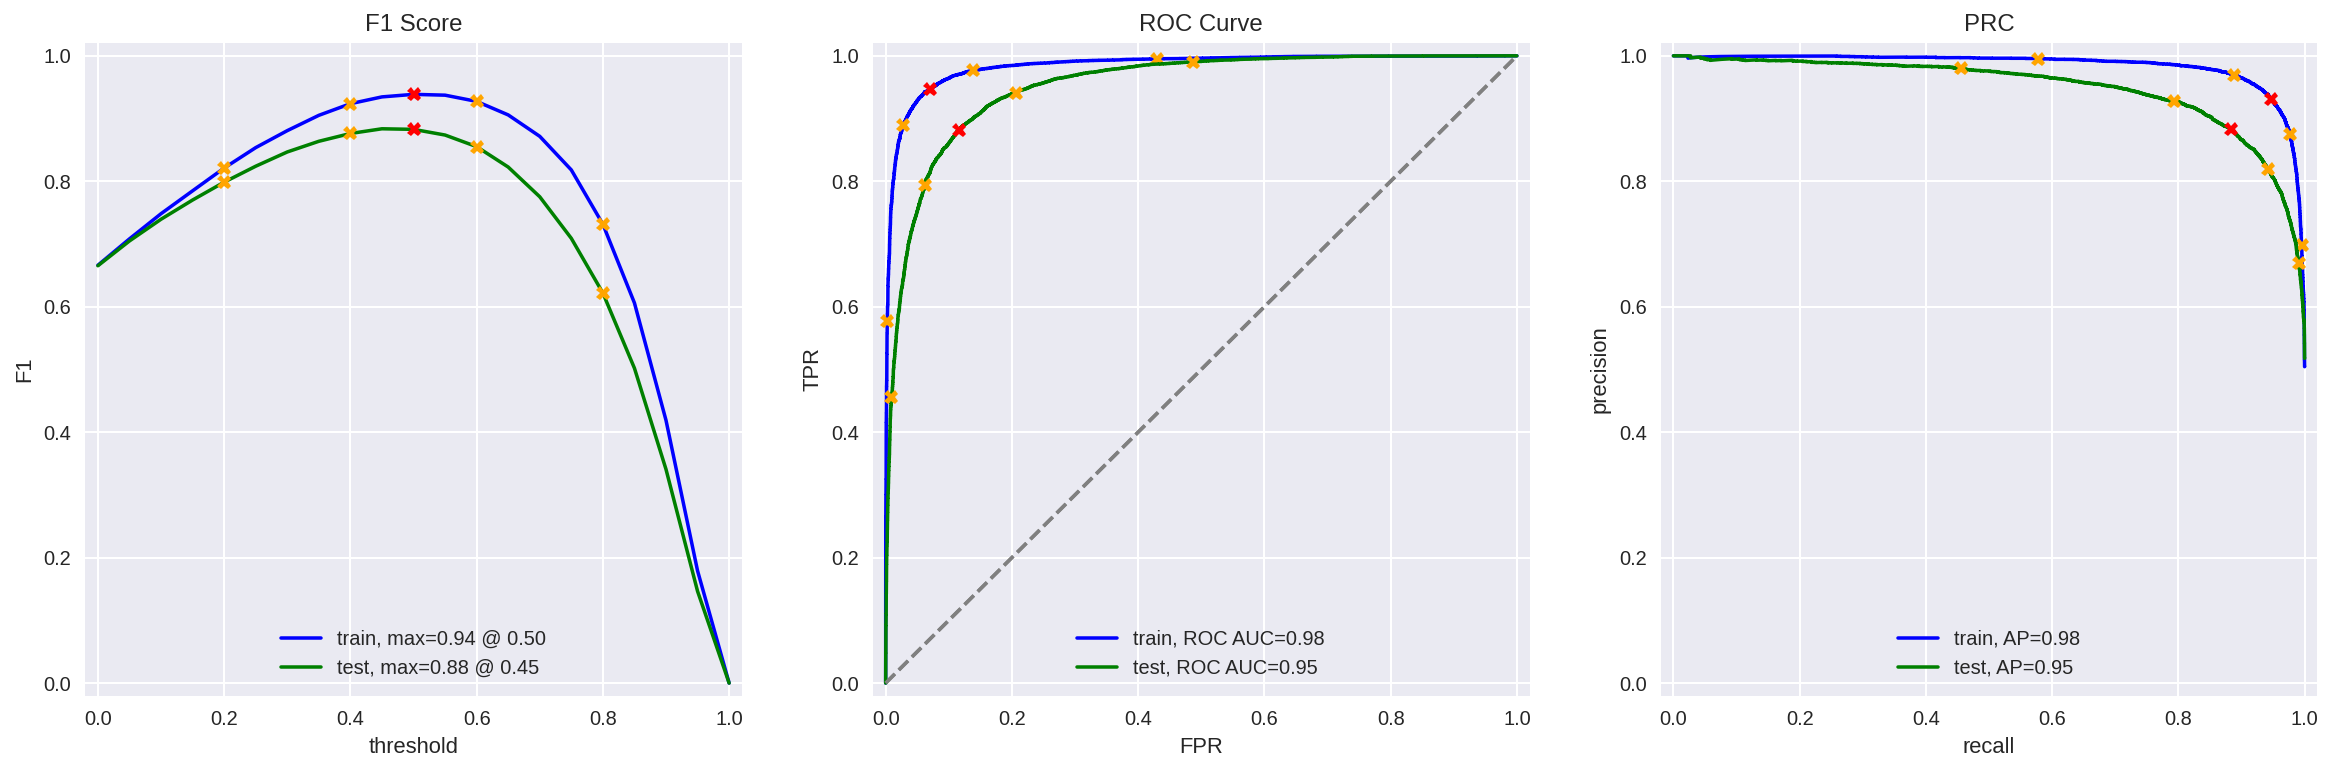

In [56]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

### Model 3 - spaCy, TF-IDF and LR

In [58]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [59]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

<div class="alert alert-success">
<b>Reviewer's comment</b>

It's nice that you tried lemmatization

</div>

In [59]:
# Applying spaCy
corpus_spacy = df_reviews['review_norm'].apply(lambda x: text_preprocessing_3(x))

In [60]:
corpus_spacy

0        the pakage imply that warren beatty and goldie...
1        how the hell do they get this make present its...
2        there be no real story the film seem more like...
3        um   a serious film about troubled teen in sin...
4        I m totally agree with garryjohal from singapo...
                               ...                        
47326    this be another of my favorite columbo it spor...
47327    talk about be bore I get this expect a fascina...
47328    I never think I d say this about a biopic but ...
47329    spirit and chaos be an artistic biopic of miya...
47330    ill make this brief this be a joy to watch it ...
Name: review_norm, Length: 47331, dtype: object

In [61]:
# TF-IDF
tf_idf = count_tf_idf.fit_transform(corpus_spacy)
print(tf_idf.shape)  #

(47331, 139742)


In [86]:
# For section 8
tfidf_vectorizer_3 = count_tf_idf.fit(corpus_spacy)

In [63]:
# tfidf_vectorizer_3.transform(corpus_spacy)

In [64]:
train_features_3 = tf_idf[train_features_reviews.index]
test_features_3 = tf_idf[test_features_reviews.index]
print(train_features_3.shape)  # (23796, 139742)
print(test_features_3.shape)  # (23535, 139742)

(23796, 139742)
(23535, 139742)


In [65]:
model_3 = LogisticRegression(random_state=12345)  # solver='liblinear', 
model_3.fit(train_features_3, train_target)

LogisticRegression(random_state=12345)

In [66]:
pred_3 = model_3.predict(test_features_3)
print(pred_3)

[0 1 1 ... 1 1 1]


In [67]:
metrics.f1_score(test_target, pred_3)

0.8774955398861609

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


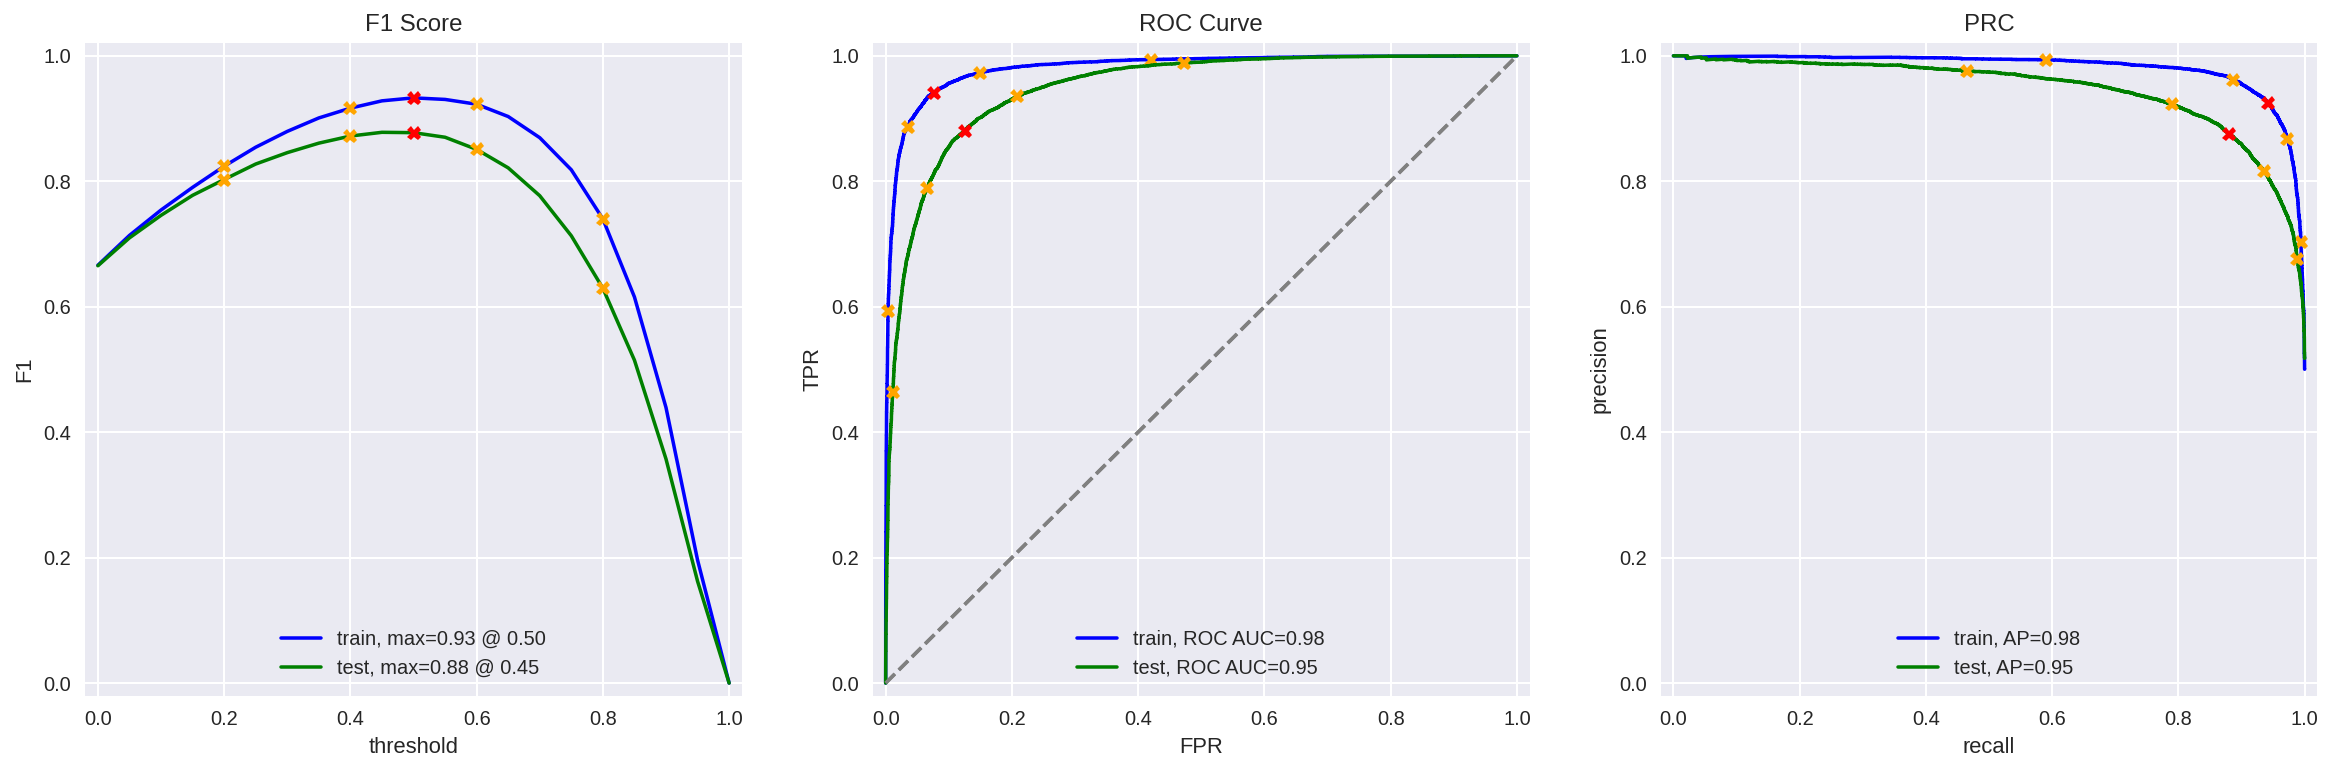

In [68]:
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [69]:
from lightgbm import LGBMClassifier

In [70]:
df_reviews['review_norm']

0        the pakage implies that warren beatty and gold...
1        how the hell did they get this made presenting...
2        there is no real story the film seems more lik...
3        um  a serious film about troubled teens in sin...
4        im totally agree with garryjohal from singapor...
                               ...                        
47326    this is another of my favorite columbos it spo...
47327    talk about being boring i got this expecting a...
47328    i never thought id say this about a biopic but...
47329    spirit and chaos is an artistic biopic of miya...
47330    ill make this brief this was a joy to watch it...
Name: review_norm, Length: 47331, dtype: object

In [71]:
# Use variables already transformed by spaCy and TF-IDF
train_features_4 = train_features_3.copy()
test_features_4 = test_features_3.copy()
print(train_features_4.shape)
print(test_features_4.shape)

(23796, 139742)
(23535, 139742)


In [87]:
# For section 8
tfidf_vectorizer_4 = count_tf_idf.fit(corpus_spacy)

In [73]:
model_4 = LGBMClassifier()
model_4.fit(train_features_4, train_target)

LGBMClassifier()

In [74]:
pred_4 = model_4.predict(test_features_4)
print(pred_3)

[0 1 1 ... 1 1 1]


In [75]:
metrics.f1_score(test_target, pred_4)

0.8589251844046365

          train  test
Accuracy   0.91  0.86
F1         0.91  0.86
APS        0.97  0.93
ROC AUC    0.97  0.94


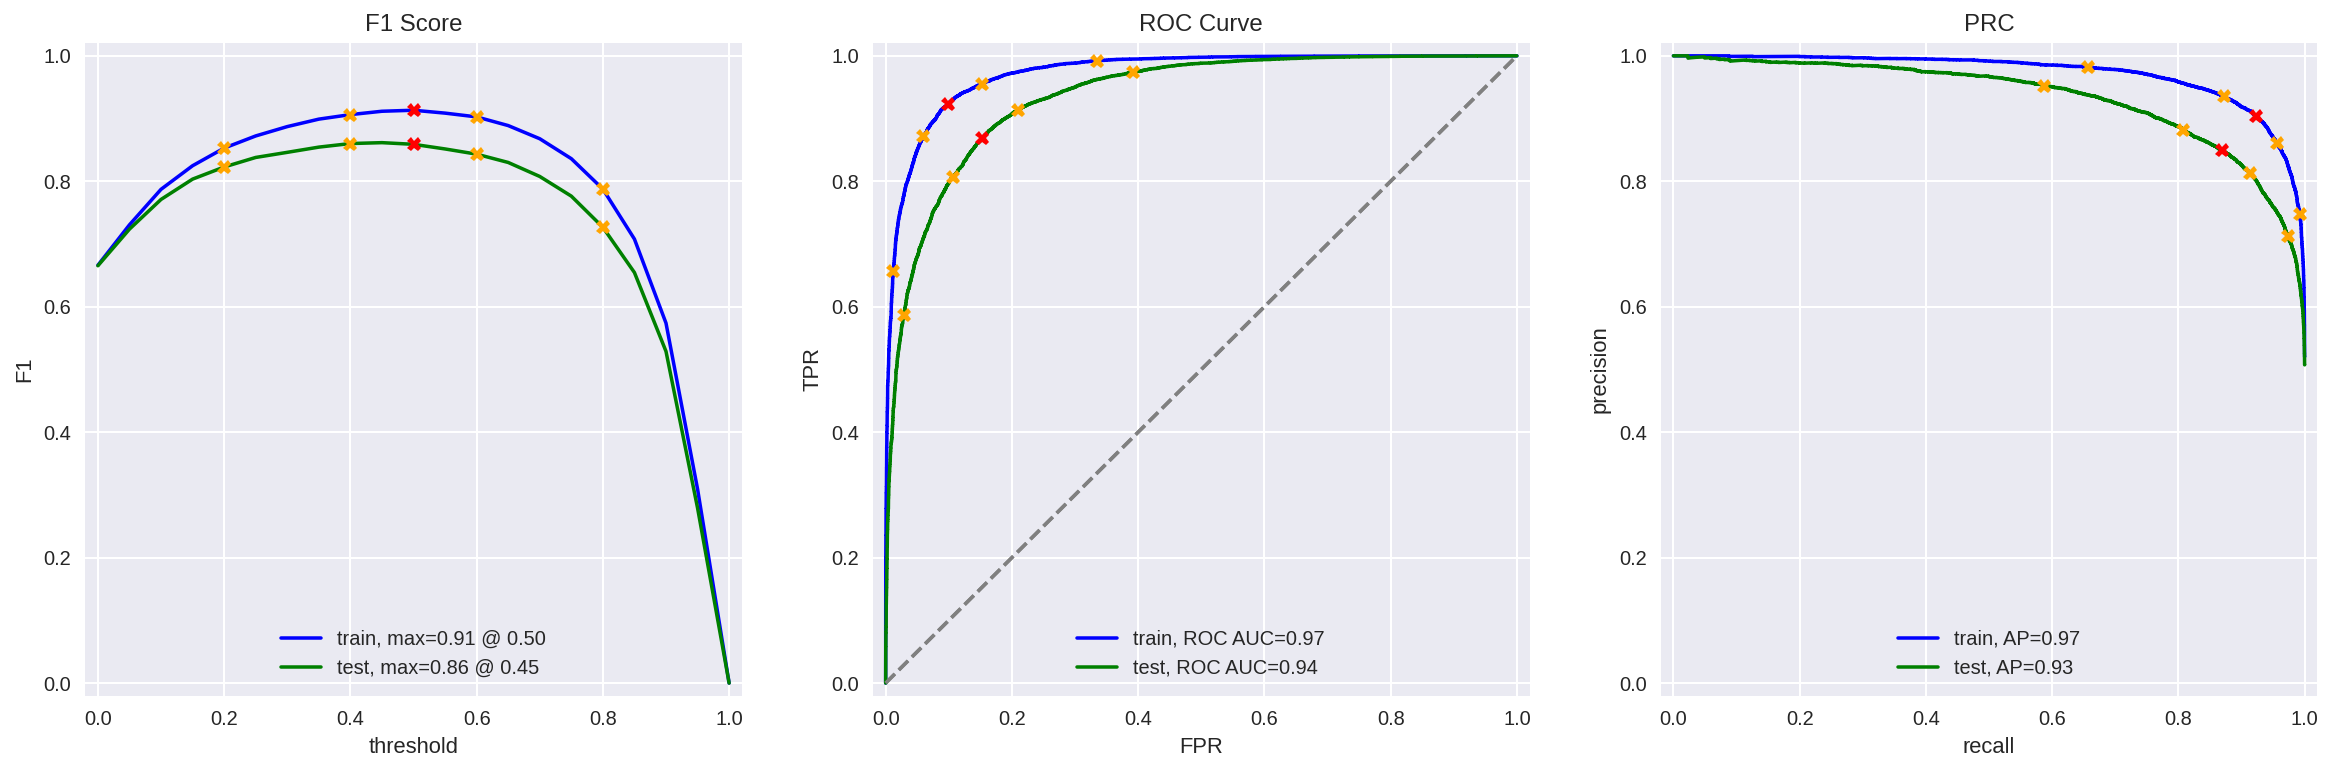

In [76]:
evaluate_model(model_4, train_features_4, train_target, test_features_4, test_target)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you vectorized text data using TF-IDF and trained a couple of different models using the resulting features

</div>

###  Model 9 - BERT

In [77]:
import torch
import transformers

In [78]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [79]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=10, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # text to padded ids of tokens along with their attention masks
    for input_text in texts.iloc[:batch_size]:
        ids = tokenizer.encode(input_text.lower(), add_special_tokens=True, truncation=True, max_length=max_length)
        padded = np.array(ids + [0]*(max_length - len(ids)))
        attention_mask = np.where(padded != 0, 1, 0)
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)
    # <put your code here to create ids_list and attention_mask_list>
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Using the {device} device.')
    
    # gettings embeddings in batches

    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <put your code here to create attention_mask_batch
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size * i:batch_size * (i + 1)]).to(device)
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The code for generating BERT embeddings is correct

</div>

In [55]:
# Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
# train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

Kept getting the following error, not sure how to proceed:

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Yeah, if you're running on the platform, there is no GPU, so forcing device 'cuda' results in an error. Running it on CPU is also not an option, as it will take a very long time. You can try running this locally if you have an nvidia GPU and know how to install CUDA, or on google colab/kaggle notebooks which give you a notebook environment with a GPU and preinstalled CUDA for free with some limitations.
    
You can also skip training this model if you'd like, as this section is optional.

</div>

<div class="alert alert-info">
    I'll opt out of the BERT sections since I only work on a laptop for now by commenting them out, but good to know the code is correct for future use.
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok, no problem!

</div>

In [ ]:
#print(df_reviews_train['review_norm'].shape)
#print(train_features_9.shape)
#print(train_target.shape)

In [97]:
#print(df_reviews_train['review_norm'].shape)
#print(train_target)

In [56]:
#model_9 = LogisticRegression(random_state=12345)
#model_9.fit(train_features_9, train_target)

In [ ]:
# if you have got the embeddings, it's advisable to save them to have them ready if 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# and load...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

## My Reviews

In [81]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(lambda x: normalize(x)) # <put here the same normalization logic as for the main dataset>

# my_reviews['review_norm'] = my_reviews['review_norm'].apply(lambda x: text_preprocessing_3(x)) 

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didnt expect the reboot to be so good writer...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i reall...


In [103]:
pos = my_reviews.copy()
pos['pos'] = [0, 0, 1, 0, 1, 1, 0, 1]
pos

,review,review_norm,pos
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie,0
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...,0
2,I was really fascinated with the movie,i was really fascinated with the movie,1
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...,0
4,I didn't expect the reboot to be so good! Writ...,i didnt expect the reboot to be so good writer...,1
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...,1
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...,0
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i reall...,1


### Model 2

In [84]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_1.predict_proba(tfidf_vectorizer_2.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.16:  i did not simply like it not my kind of movie
0.18:  well i was bored and felt asleep in the middle of the movie
0.57:  i was really fascinated with the movie
0.13:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.26:  i didnt expect the reboot to be so good writers really cared about the source material
0.48:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.04:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.85:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


6 of 8 correct

### Model 3

In [90]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.20:  i did not simply like it not my kind of movie
0.13:  well i was bored and felt asleep in the middle of the movie
0.50:  i was really fascinated with the movie
0.10:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.27:  i didnt expect the reboot to be so good writers really cared about the source material
0.47:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.03:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.92:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


5 of 8 correct

### Model 4

In [89]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.58:  i did not simply like it not my kind of movie
0.28:  well i was bored and felt asleep in the middle of the movie
0.61:  i was really fascinated with the movie
0.36:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.70:  i didnt expect the reboot to be so good writers really cared about the source material
0.69:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.30:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.79:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


8 of 8 correct

### Model 9

In [57]:
#texts = my_reviews['review_norm']

#my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

#my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

#for i, review in enumerate(texts.str.slice(0, 100)):
#    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

<div class="alert alert-success">
<b>Reviewer's comment</b>

The models were applied to new reviews correctly

</div>

## Conclusions

Note: Unfortunately, I could not get the Bert model (model 9) working correctly since it kept giving an error related to an NVIDIA driver. Any guidance would be appreciated.

Not including the BERT model, the Film Junky Union can use model 1, 3, or 4 to help predict positive and negative reviews since they achieved a higher F1 score of 0.85. These three models were relatively close in F1 scores.

On the My Reviews section, only model 4 was able to get all eight of the reviews correctly assigned as positive or negative.

With these points in mind, model 4 could be the best model to use for Film Junky Union.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Nice summary!

</div>

<div class="alert alert-info">
    Appreciate you taking the time to give your suggestions and feedback!
    Thank you Dmitry! 
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

You're welcome! The project is now accepted. Good luck on the next sprint!

</div>

# Checklist

- [x]  Notebook was opened
- [ ]  The text data is loaded and pre-processed for vectorization
- [ ]  The text data is transformed to vectors
- [ ]  Models are trained and tested
- [ ]  The metric's threshold is reached
- [ ]  All the code cells are arranged in the order of their execution
- [ ]  All the code cells can be executed without errors
- [ ]  There are conclusions